In [8]:
import qutip as qt
from qutip import *
import numpy as np
import scipy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [9]:
#Operadores del Hamiltoniano
c = qt.qeye(2).to("CSR")
n = qt.Qobj([[0, 0], [0, 1]]).to("CSR")
m= qt.Qobj([[1,0],[0,0]]).to("CSR")
s = qt.Qobj([[0, 1], [1, 0]]).to("CSR")

#Vectores de la base
vi=basis(2,1)
mu=basis(2,0)

In [10]:
#FUNCIONES

#Posiciones de los coeficientes
def posiciones(matpsi):
    pos=[]
    sumpsi=sum(matpsi.T)
    for i in range(len(matpsi[:,0])):
        if sumpsi[i]!=0:
            pos.append(i)
    return pos

#SIMPLIFICACIÓN representación algebraica->bits
def simp(vec,Nbits):
    n=len(vec)
    vecsimp=np.zeros(Nbits)
    for i in range(Nbits):
        if sum(vec[:(n//2)])>0:
            vec=vec[:(n//2)]
            n=len(vec)
        elif sum(vec[(n//2):])>0:
            vecsimp[i]=1
            vec=vec[(n//2):]
            n=len(vec)
    return vecsimp

#vector de bits simplificado
def simpa_bin(posiciones,Nbits):
    estadosbin = [] 
    for i in posiciones:
        estado = np.zeros(2**Nbits) 
        estado[i] = 1
        estadosbin.append(simp(estado,Nbits))  
    estadosbin = np.array(estadosbin)
    return estadosbin

#elemento de matriz diagonal de t
def matel_diag_t(Op,psi,t):
    el=[]
    for i in range(len(t)):
        el.append(psi[i].dag().to("csr")*Op*psi[i].to("csr"))
    return el

#entropía de von neuman
def entropia(nbits,t,psi):
    S=[[],[],[],[],[],[],[],[],[],[],[],[]]
    for j in range(nbits):
        for i in range(len(t)):
            rhot=(ket2dm(psi[i].to("CSR")).to("CSR")).ptrace(j)
            S[j].append(entropy_vn(rhot))
    return S

#elemento de matriz diagonal de t +plot
def matel_dt_plot(Op,psi,t,bit):
    el=[]
    for i in range(len(t)):
        el.append(psi[i].dag().to("csr")*Op*psi[i].to("csr"))
    plt.plot(t,el,label='bit{}'.format(bit))
    plt.xlim([min(t),max(t)])
    return el

#ritmo de cambio de espín
def dSdt(spes,t,bit):
    dSdt=[]
    dt=t[1]-t[0]
    for i in range(len(t)-1):
        dSdt.append((spes[i+1]-spes[i])/dt)
    plt.plot(t[1:],dSdt,label='{}'.format(bit))
    plt.xlim([min(t),max(t)])
    return dSdt

1:CASO DE PRUEBA CON 5 BITS

In [11]:
#Hamiltoniano
h0_15b=tensor(s,n,m,n,m)
h0_25b=tensor(s,n,m,m,n)
h0_35b=tensor(s,m,n,m,n)
h0_45b=tensor(s,m,n,n,m)
h0_55b=tensor(s,n,n,m,m)
h0_65b=tensor(s,m,m,n,n)

h1_15b=tensor(m,s,n,m,n)
h1_25b=tensor(n,s,n,m,m)
h1_35b=tensor(n,s,m,n,m)
h1_45b=tensor(m,s,m,n,n)
h1_55b=tensor(m,s,n,n,m)
h1_65b=tensor(n,s,m,m,n)

h2_15b=tensor(n,m,s,n,m)
h2_25b=tensor(m,n,s,n,m)
h2_35b=tensor(m,n,s,m,n)
h2_45b=tensor(n,m,s,m,n)
h2_55b=tensor(m,m,s,n,n)
h2_65b=tensor(n,n,s,m,m)

h3_15b=tensor(m,n,m,s,n)
h3_25b=tensor(m,m,n,s,n)
h3_35b=tensor(n,m,n,s,m)
h3_45b=tensor(n,n,m,s,m)
h3_55b=tensor(n,m,m,s,n)
h3_65b=tensor(m,n,n,s,m)

h4_15b=tensor(n,m,n,m,s)
h4_25b=tensor(n,m,m,n,s)
h4_35b=tensor(m,n,m,n,s)
h4_45b=tensor(m,n,n,m,s)
h4_55b=tensor(n,n,m,m,s)
h4_65b=tensor(m,m,n,n,s)

H5b=h0_15b+h0_25b+h0_35b+h0_45b+h0_55b+h0_65b+h1_15b+h1_25b+h1_35b+h1_45b+h1_55b+h1_65b+h2_15b+h2_25b+h2_35b+h2_45b+h2_55b+h2_65b+h3_15b+h3_25b+h3_35b+h3_45b+h3_55b+h3_65b+h4_15b+h4_25b+h4_35b+h4_45b+h4_55b+h4_65b

In [12]:
#Solución psi(t)

#psi05b=tensor(mu,vi,mu,vi,mu)
psi05b=tensor(vi,mu,vi,mu,vi)
Nbits5b=5
t5b=np.linspace(0,10,200)
Nx5b=len(psi05b.full())
Nt5b=len(t5b)
psi5b=sesolve(H5b,psi05b,t5b)
psit5b=psi5b.states

<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:48: SyntaxWarning: invalid escape sequence '\p'
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\3733135682.py:21: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Re(|$\psi$>)")
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\3733135682.py:34: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Im(|$\psi$>)")
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\3733135682.py:48: SyntaxWarning: invalid escape sequence '\p'
  plt.title("|$<i|\psi>|^2$")


Text(0.5, 0, 't')

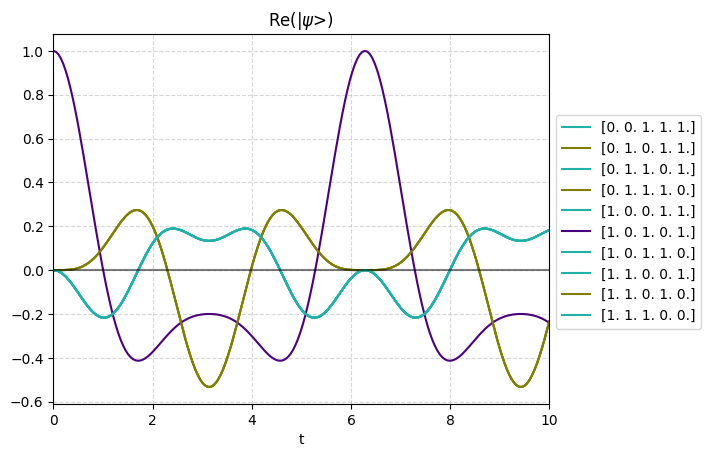

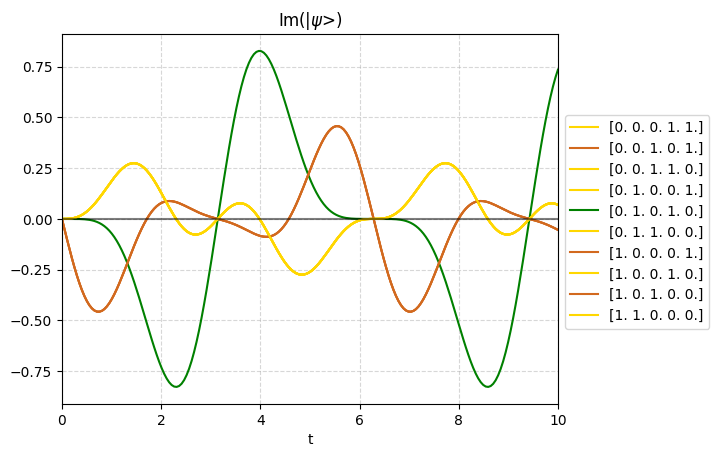

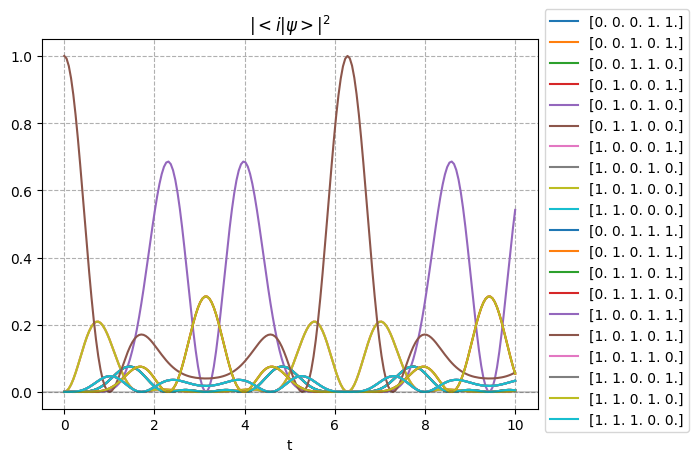

In [13]:
#Coeficientes función de onda

#matriz psi(t) y posiciones coeficientes
matpsi=np.transpose(np.array([psit5b[i].full().reshape(-1) for i in range(Nt5b)]))
repos=posiciones(matpsi.real)
impos=posiciones(matpsi.imag)
rebin=simpa_bin(repos,Nbits5b)
imbin=simpa_bin(impos,Nbits5b)

#-Plot coeficientes-

#coeficientes reales
colvecre=['lightseagreen','olive','lightseagreen','olive','lightseagreen','indigo','lightseagreen','lightseagreen','olive','lightseagreen']

plt.figure(0)
for i in range(len(repos)):
    plt.plot(t5b,matpsi.real[repos[i],:],label='{}'.format(rebin[i]),color=colvecre[i])
plt.axhline(y=0,color='k',alpha=0.5)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.8))
plt.grid(linestyle='--',alpha=0.5)
plt.title("Re(|$\psi$>)")
plt.xlabel('t')
plt.xlim([0,max(t5b)])

#coeficientes imaginarios
colvecim=['gold','chocolate','gold','gold','green','gold','chocolate','gold','chocolate','gold']

plt.figure(1)
for i in range(len(impos)):
    plt.plot(t5b,matpsi.imag[impos[i],:],label='{}'.format(imbin[i]),color=colvecim[i])
plt.axhline(y=0,color='k',alpha=0.5)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.8))
plt.grid(linestyle='--',alpha=0.5)
plt.title("Im(|$\psi$>)")
plt.xlabel('t')
plt.xlim([0,max(t5b)])

#probabiliad total
plt.figure(2)
for i in range(len(impos)):
    plt.plot(t5b,np.power(matpsi.imag[impos[i],:],2),label='{}'.format(imbin[i]))
for i in range(len(repos)):
    plt.plot(t5b,np.power(matpsi.real[repos[i],:],2),label='{}'.format(rebin[i]))
plt.axhline(y=0,color='k',alpha=0.2)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.1))
#plt.tight_layout()
plt.grid(linestyle='--')
plt.title("|$<i|\psi>|^2$")
plt.xlabel('t')


Text(0.5, 1.0, 'Evolución de [1. 0. 1. 0. 1.]')

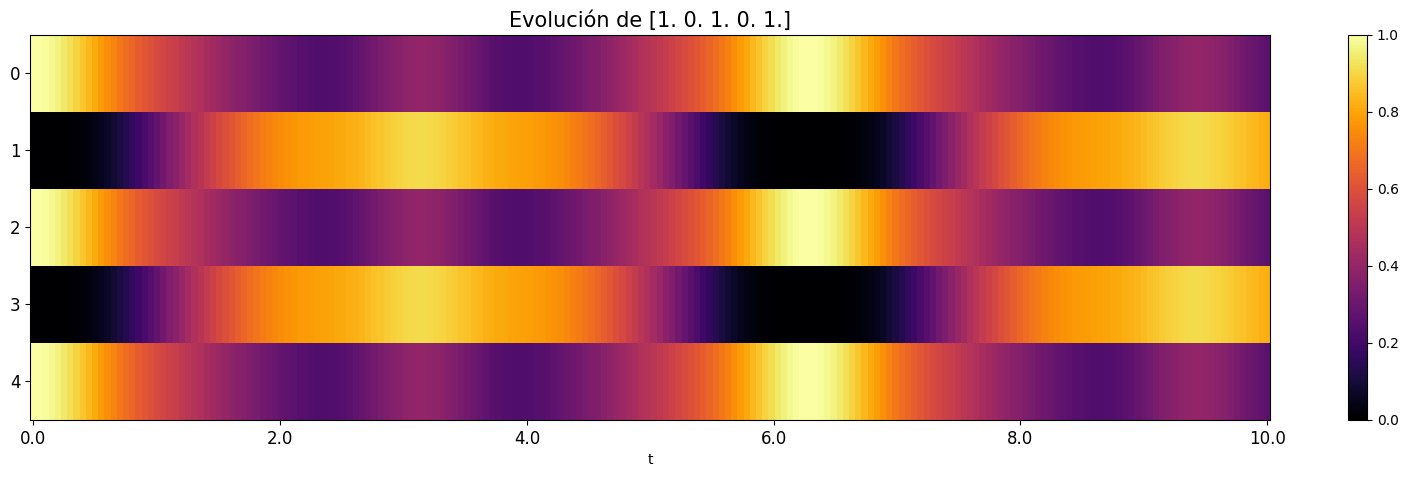

In [14]:
#Densidad de población
n05b=qt.tensor(n,c,c,c,c)
n15b=qt.tensor(c,n,c,c,c)
n25b=qt.tensor(c,c,n,c,c)
n35b=qt.tensor(c,c,c,n,c)
n45b=qt.tensor(c,c,c,c,n)

n0es5b=matel_diag_t(n05b,psit5b,t5b)
n1es5b=matel_diag_t(n15b,psit5b,t5b)
n2es5b=matel_diag_t(n25b,psit5b,t5b)
n3es5b=matel_diag_t(n35b,psit5b,t5b)
n4es5b=matel_diag_t(n45b,psit5b,t5b)

matdens5b=np.array([n0es5b,n1es5b,n2es5b,n3es5b,n4es5b])
plt.figure(figsize=(20, 5)) 
mapacolor5b=plt.imshow(matdens5b.real,aspect='auto',cmap='inferno',interpolation='nearest') #Otros colores: 'Greys','inferno'.'blues
plt.colorbar(mapacolor5b)
plt.yticks(ticks=[0, 1, 2, 3,4], labels=['0', '1', '2','3','4'],fontsize=12)
plt.xlabel('t')
plt.xticks(np.linspace(0,Nt5b- 1, num=6), np.linspace(0, max(t5b), num=6),fontsize=12)
plt.title('Evolución de {}'.format(simpa_bin(posiciones(psi05b.full()),Nbits5b)[0]),fontsize=15)

2:DINÁMICA DE 12 BITS

In [15]:
#Hamiltoniano 12 bits
h0_2=qt.tensor(s,n,m,c,c,c,c,c,c,c,m,n)
h0_1=qt.tensor(s,n,m,c,c,c,c,c,c,c,n,m)
h0_3=qt.tensor(s,m,n,c,c,c,c,c,c,c,m,n)
h0_4=qt.tensor(s,m,n,c,c,c,c,c,c,c,n,m)
h0_5=qt.tensor(s,n,n,c,c,c,c,c,c,c,m,m)
h0_6=qt.tensor(s,m,m,c,c,c,c,c,c,c,n,n)

h1_2=qt.tensor(n,s,n,m,c,c,c,c,c,c,c,m)
h1_1=qt.tensor(m,s,n,m,c,c,c,c,c,c,c,n)
h1_3=qt.tensor(n,s,m,n,c,c,c,c,c,c,c,m)
h1_4=qt.tensor(m,s,m,n,c,c,c,c,c,c,c,n)
h1_5=qt.tensor(m,s,n,n,c,c,c,c,c,c,c,m)
h1_6=qt.tensor(n,s,m,m,c,c,c,c,c,c,c,n)

h2_2=qt.tensor(m,n,s,n,m,c,c,c,c,c,c,c)
h2_1=qt.tensor(n,m,s,n,m,c,c,c,c,c,c,c)
h2_3=qt.tensor(m,n,s,m,n,c,c,c,c,c,c,c)
h2_4=qt.tensor(n,m,s,m,n,c,c,c,c,c,c,c)
h2_5=qt.tensor(m,m,s,n,n,c,c,c,c,c,c,c)
h2_6=qt.tensor(n,n,s,m,m,c,c,c,c,c,c,c)

h3_2=qt.tensor(c,m,n,s,n,m,c,c,c,c,c,c)
h3_1=qt.tensor(c,n,m,s,n,m,c,c,c,c,c,c)
h3_3=qt.tensor(c,m,n,s,m,n,c,c,c,c,c,c)
h3_4=qt.tensor(c,n,m,s,m,n,c,c,c,c,c,c)
h3_5=qt.tensor(c,m,m,s,n,n,c,c,c,c,c,c)
h3_6=qt.tensor(c,n,n,s,m,m,c,c,c,c,c,c)

h4_2=qt.tensor(c,c,m,n,s,n,m,c,c,c,c,c)
h4_1=qt.tensor(c,c,n,m,s,n,m,c,c,c,c,c)
h4_3=qt.tensor(c,c,m,n,s,m,n,c,c,c,c,c)
h4_4=qt.tensor(c,c,n,m,s,m,n,c,c,c,c,c)
h4_5=qt.tensor(c,c,m,m,s,n,n,c,c,c,c,c)
h4_6=qt.tensor(c,c,n,n,s,m,m,c,c,c,c,c)

h5_2=qt.tensor(c,c,c,m,n,s,n,m,c,c,c,c)
h5_1=qt.tensor(c,c,c,n,m,s,n,m,c,c,c,c)
h5_3=qt.tensor(c,c,c,m,n,s,m,n,c,c,c,c)
h5_4=qt.tensor(c,c,c,n,m,s,m,n,c,c,c,c)
h5_5=qt.tensor(c,c,c,m,m,s,n,n,c,c,c,c)
h5_6=qt.tensor(c,c,c,n,n,s,m,m,c,c,c,c)

h6_2=qt.tensor(c,c,c,c,m,n,s,n,m,c,c,c)
h6_1=qt.tensor(c,c,c,c,n,m,s,n,m,c,c,c)
h6_3=qt.tensor(c,c,c,c,m,n,s,m,n,c,c,c)
h6_4=qt.tensor(c,c,c,c,n,m,s,m,n,c,c,c)
h6_5=qt.tensor(c,c,c,c,m,m,s,n,n,c,c,c)
h6_6=qt.tensor(c,c,c,c,n,n,s,m,m,c,c,c)

h7_2=qt.tensor(c,c,c,c,c,m,n,s,n,m,c,c)
h7_1=qt.tensor(c,c,c,c,c,n,m,s,n,m,c,c)
h7_3=qt.tensor(c,c,c,c,c,m,n,s,m,n,c,c)
h7_4=qt.tensor(c,c,c,c,c,n,m,s,m,n,c,c)
h7_5=qt.tensor(c,c,c,c,c,m,m,s,n,n,c,c)
h7_6=qt.tensor(c,c,c,c,c,n,n,s,m,m,c,c)

h8_2=qt.tensor(c,c,c,c,c,c,m,n,s,n,m,c)
h8_1=qt.tensor(c,c,c,c,c,c,n,m,s,n,m,c)
h8_3=qt.tensor(c,c,c,c,c,c,m,n,s,m,n,c)
h8_4=qt.tensor(c,c,c,c,c,c,n,m,s,m,n,c)
h8_5=qt.tensor(c,c,c,c,c,c,m,m,s,n,n,c)
h8_6=qt.tensor(c,c,c,c,c,c,n,n,s,m,m,c)

h9_1=qt.tensor(c,c,c,c,c,c,c,n,m,s,n,m)
h9_2=qt.tensor(c,c,c,c,c,c,c,m,n,s,n,m)
h9_3=qt.tensor(c,c,c,c,c,c,c,m,n,s,m,n)
h9_4=qt.tensor(c,c,c,c,c,c,c,n,m,s,m,n)
h9_5=qt.tensor(c,c,c,c,c,c,c,m,m,s,n,n)
h9_6=qt.tensor(c,c,c,c,c,c,c,n,n,s,m,m)

h10_1=qt.tensor(m,c,c,c,c,c,c,c,n,m,s,n)
h10_2=qt.tensor(m,c,c,c,c,c,c,c,m,n,s,n)
h10_3=qt.tensor(n,c,c,c,c,c,c,c,m,n,s,m)
h10_4=qt.tensor(n,c,c,c,c,c,c,c,n,m,s,m)
h10_5=qt.tensor(n,c,c,c,c,c,c,c,m,m,s,n)
h10_6=qt.tensor(m,c,c,c,c,c,c,c,n,n,s,m)

h11_1=qt.tensor(n,m,c,c,c,c,c,c,c,n,m,s)
h11_2=qt.tensor(n,m,c,c,c,c,c,c,c,m,n,s)
h11_3=qt.tensor(m,n,c,c,c,c,c,c,c,m,n,s)
h11_4=qt.tensor(m,n,c,c,c,c,c,c,c,m,n,s)
h11_5=qt.tensor(n,n,c,c,c,c,c,c,c,m,m,s)
h11_6=qt.tensor(m,m,c,c,c,c,c,c,c,n,n,s)

H=h0_1+h0_2+h0_3+h0_4+h0_5+h0_6+h1_1+h1_2+h1_3+h1_4+h1_5+h1_6+h2_1+h2_2+h2_3+h2_4+h2_5+h2_6+h3_1+h3_2+h3_3+h3_4+h3_5+h3_6+h4_1+h4_2+h4_3+h4_4+h4_5+h4_6+\
h5_1+h5_2+h5_3+h5_4+h5_5+h5_6+h6_1+h6_2+h6_3+h6_4+h6_5+h6_6+h7_1+h7_2+h7_3+h7_4+h7_5+h7_6+h8_1+h8_2+h8_3+h8_4+h8_5+h8_6+h9_1+h9_2+h9_3+h9_4+h9_5+h9_6+\
h11_1+h11_2+h11_3+h11_4+h11_5+h11_6+h10_1+h10_2+h10_3+h10_4+h10_5+h10_6

In [16]:
#Solución psi(t)
psi0=((tensor(mu,mu,mu,mu,vi,mu,vi,mu,mu,mu,mu,mu)).unit()).to("CSR") # (blinker)
#psi0=((tensor(mu,mu,vi,mu,vi,mu,vi,mu,vi,mu,mu,mu)).unit()).to("CSR") # (termal)
Nbits=12
t=np.linspace(0,100,100)
Nx=len(psi0.full())
Nt=len(t)
psi=sesolve(H,psi0,t)
psit=psi.states

c:\Users\javim\miniconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\javim\miniconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


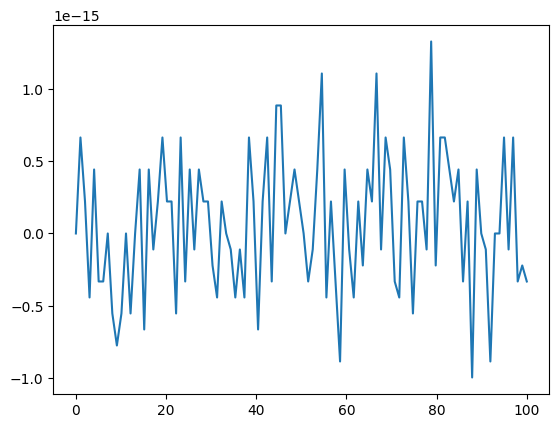

In [17]:
#error de normalización
norm=[]
for i in range(Nt):
    norm.append((psit[i].dag()*psit[i]))
plt.plot(np.linspace(0,Nt,len(norm)),np.array(norm)-np.ones(len(norm)))

Text(0.5, 1.0, 'Evolución de [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]')

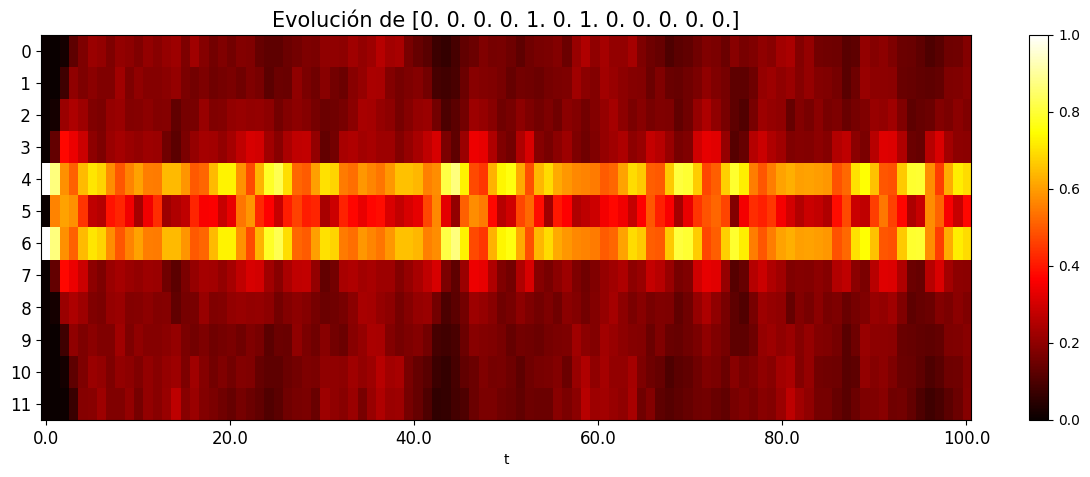

In [18]:
#densidad de población

n0=qt.tensor(n,c,c,c,c,c,c,c,c,c,c,c)
n1=qt.tensor(c,n,c,c,c,c,c,c,c,c,c,c)
n2=qt.tensor(c,c,n,c,c,c,c,c,c,c,c,c)
n3=qt.tensor(c,c,c,n,c,c,c,c,c,c,c,c)
n4=qt.tensor(c,c,c,c,n,c,c,c,c,c,c,c)
n5=qt.tensor(c,c,c,c,c,n,c,c,c,c,c,c)
n6=qt.tensor(c,c,c,c,c,c,n,c,c,c,c,c)
n7=qt.tensor(c,c,c,c,c,c,c,n,c,c,c,c)
n8=qt.tensor(c,c,c,c,c,c,c,c,n,c,c,c)
n9=qt.tensor(c,c,c,c,c,c,c,c,c,n,c,c)
n10=qt.tensor(c,c,c,c,c,c,c,c,c,c,n,c)
n11=qt.tensor(c,c,c,c,c,c,c,c,c,c,c,n)

n0es=matel_diag_t(n0,psit,t)
n1es=matel_diag_t(n1,psit,t)
n2es=matel_diag_t(n2,psit,t)
n3es=matel_diag_t(n3,psit,t)
n4es=matel_diag_t(n4,psit,t)
n5es=matel_diag_t(n5,psit,t)
n6es=matel_diag_t(n6,psit,t)
n7es=matel_diag_t(n7,psit,t)
n8es=matel_diag_t(n8,psit,t)
n9es=matel_diag_t(n9,psit,t)
n10es=matel_diag_t(n10,psit,t)
n11es=matel_diag_t(n11,psit,t)

matdens=np.array([n0es,n1es,n2es,n3es,n4es,n5es,n6es,n7es,n8es,n9es,n10es,n11es])
plt.figure(figsize=(15, 5)) 
mapacolor=plt.imshow(matdens.real,aspect='auto',cmap='hot',interpolation='nearest') #Otros colores: cmap='BuPu','RdGy_r','cubehelix','CMRmap','hot'
plt.colorbar(mapacolor)
plt.yticks(ticks=[0, 1, 2, 3,4,5,6,7,8,9,10,11], labels=[' 0', ' 1', ' 2',' 3',' 4',' 5', ' 6', ' 7',' 8',' 9','10','11'],fontsize=12)
plt.xlabel('t')
plt.xticks(np.linspace(0,Nt- 1, num=6), np.linspace(0, max(t), num=6),fontsize=12)
plt.title('Evolución de {}'.format(simpa_bin(posiciones(psi0.full()),Nbits)[0]),fontsize=15)

<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\726094046.py:31: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$<\sigma_z>$',fontsize=14)
c:\Users\javim\miniconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\javim\miniconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Valor esperado de espín en cada cúbit')

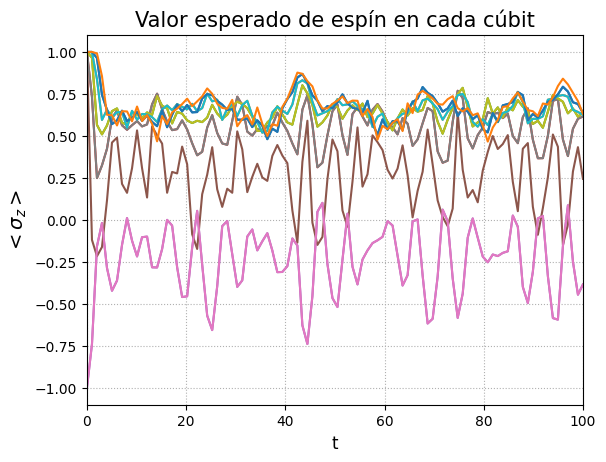

In [19]:
#espines individuales
sp0=tensor(sigmaz(),c,c,c,c,c,c,c,c,c,c,c)
sp1=tensor(c,sigmaz(),c,c,c,c,c,c,c,c,c,c)
sp2=tensor(c,c,sigmaz(),c,c,c,c,c,c,c,c,c)
sp3=tensor(c,c,c,sigmaz(),c,c,c,c,c,c,c,c)
sp4=tensor(c,c,c,c,sigmaz(),c,c,c,c,c,c,c)
sp5=tensor(c,c,c,c,c,sigmaz(),c,c,c,c,c,c)
sp6=tensor(c,c,c,c,c,c,sigmaz(),c,c,c,c,c)
sp7=tensor(c,c,c,c,c,c,c,sigmaz(),c,c,c,c)
sp8=tensor(c,c,c,c,c,c,c,c,sigmaz(),c,c,c)
sp9=tensor(c,c,c,c,c,c,c,c,c,sigmaz(),c,c)
sp10=tensor(c,c,c,c,c,c,c,c,c,c,sigmaz(),c)
sp11=tensor(c,c,c,c,c,c,c,c,c,c,c,sigmaz())


plt.figure(0)
sp0es=matel_dt_plot(sp0,psit,t,0)
sp1es=matel_dt_plot(sp1,psit,t,1)
sp2es=matel_dt_plot(sp2,psit,t,2)
sp3es=matel_dt_plot(sp3,psit,t,3)
sp4es=matel_dt_plot(sp4,psit,t,4)
sp5es=matel_dt_plot(sp5,psit,t,5)
sp6es=matel_dt_plot(sp6,psit,t,6)
sp7es=matel_dt_plot(sp7,psit,t,7)
sp8es=matel_dt_plot(sp8,psit,t,8)
sp9es=matel_dt_plot(sp9,psit,t,9)
sp10es=matel_dt_plot(sp10,psit,t,10)
sp11es=matel_dt_plot(sp11,psit,t,11)

plt.grid(linestyle=':')
plt.ylabel('$<\sigma_z>$',fontsize=14)
plt.xlabel('t',fontsize=12)
plt.title('Valor esperado de espín en cada cúbit',fontsize=15)
#plt.legend() #para ver qué hace cada cúbit

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\D'
<>:29: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\D'
<>:29: SyntaxWarning: invalid escape sequence '\D'
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\2101430928.py:8: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(t,spes,linewidth=0.8,label='<$\sigma_z$>')
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\2101430928.py:13: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('<$\sigma_z$>$_{tot}$',fontsize=15)
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\2101430928.py:24: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(t,spdesvest,linewidth=0.8,label='$\Delta\sigma_z$')
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\2101430928.py:29: SyntaxWarning: invalid es

espín de equilibrio: (5.480153844733309+0j)
desvest de equilibrio: (4.533255283212837+0j)


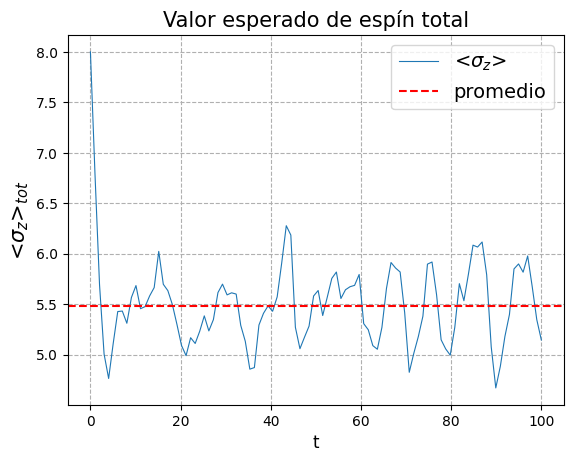

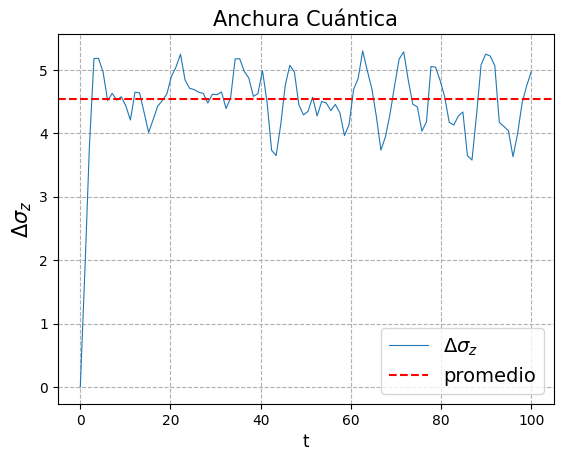

In [20]:
#espines totales
sptot=sp0+sp1+sp2+sp3+sp4+sp5+sp6+sp7+sp8+sp9+sp10+sp11 #necesario haber corrido espines individuales para correr esta parte 

#espin total
spes=np.array(sp0es)+np.array(sp1es)+np.array(sp2es)+np.array(sp3es)+np.array(sp4es)+np.array(sp5es)+np.array(sp6es)+np.array(sp7es)+np.array(sp8es)+np.array(sp9es)+np.array(sp10es)+np.array(sp11es)
speseq=np.sum(spes[10:])/len(spes[10:])
plt.figure(1)
plt.plot(t,spes,linewidth=0.8,label='<$\sigma_z$>')
plt.axhline(speseq,linestyle='--',color='red',label='promedio')
plt.title("Valor esperado de espín total",fontsize=15)
plt.grid(linestyle='--')
plt.xlabel('t',fontsize=12)
plt.ylabel('<$\sigma_z$>$_{tot}$',fontsize=15)
plt.legend(fontsize=14)
print('espín de equilibrio: {}'.format(speseq))

#anchura cuántica
plt.figure(2)
spdesvest=[]
for i in range(Nt):
    spvec=sptot*psit[i]
    spdesvest.append(np.sqrt((spvec.dag()*spvec)-spes[i]**2))
spdesvesteq=np.sum(spdesvest[10:])/len(spdesvest[10:])
plt.plot(t,spdesvest,linewidth=0.8,label='$\Delta\sigma_z$')
plt.title('Anchura Cuántica',fontsize=15)
plt.axhline(spdesvesteq,linestyle='--',color='red',label='promedio')
plt.grid(linestyle='--')
plt.xlabel('t',fontsize=12)
plt.ylabel('$\Delta\sigma_z$',fontsize=15)
plt.legend(fontsize=14)
print('desvest de equilibrio: {}'.format(spdesvesteq))

Amplitud= 14.10824763794966
Media= 5.456633513231496
Desviación estándar= 0.38211862416220493


<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\3452783779.py:26: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma_{z,tot}$',size=14)
c:\Users\javim\miniconda3\Lib\site-packages\numpy\lib\_histograms_impl.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
c:\Users\javim\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:647: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)


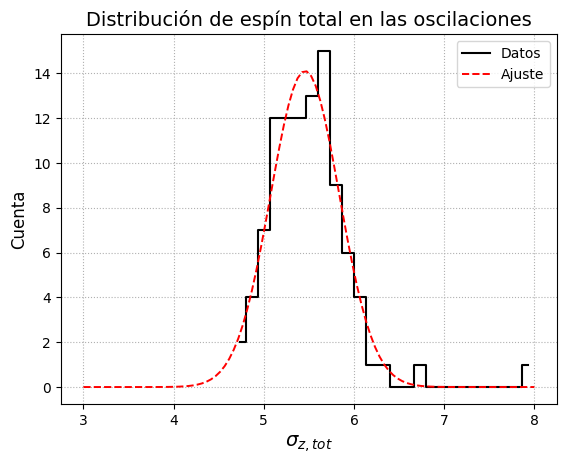

In [21]:
#distribuciones de espin

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

num_bins = 25
hist, bin_edges = np.histogram(spes, bins=num_bins) #cambiando spes por spdesvest se puede ver para la anchura cuántica también
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])


p0 = [20., 0., 1.]#parámetros aproximados iniciales-(A,mu,sig)
coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)
hist_fit = gauss(bin_centers, *coeff)

plt.plot(bin_centers, hist, drawstyle='steps-mid',label='Datos',color='black') #histograma

#PLOT DE AJUSTES
rangofit=np.linspace(3,8,100) #NECESARIO AJUSTAR EL RANGO PARA CADA CASO
plt.plot(rangofit, gauss(rangofit,*coeff), label='Ajuste',color='red',linewidth=1.4,linestyle='--') #blinker
#plt.plot(np.linspace(-1,1,100), gauss(np.linspace(-1,1,100),*coeff), label='Ajuste',color='red',linewidth=1.4,linestyle='--') #termal

plt.grid(linestyle=':')
plt.legend()
plt.title('Distribución de espín total en las oscilaciones',size=14)
plt.xlabel('$\sigma_{z,tot}$',size=14)
plt.ylabel('Cuenta',size=12)

print('Amplitud=',coeff[0])
print ('Media=', coeff[1])
print ('Desviación estándar=', coeff[2])

plt.show()

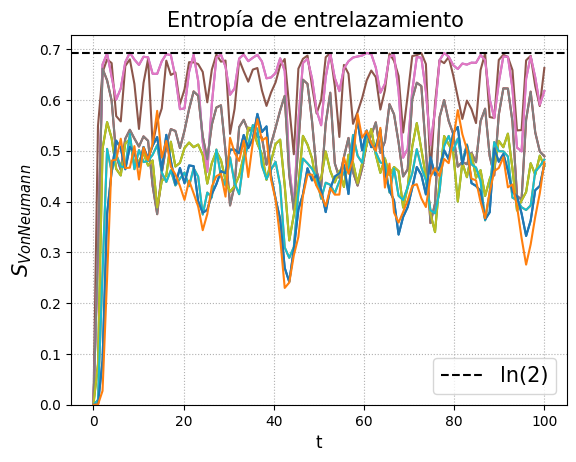

In [22]:
#Entropía

S=entropia(Nbits,t,psit)

for i in range(Nbits):
    plt.plot(t,S[i])
    #plt.plot(t,S[i],label='bit{}'.format(i)) #para ver lo que hace cada bit
#plt.xlim([0,10]) #para fijarse sólo en el comienzo
plt.ylim(bottom=0)
plt.axhline(np.log(2),linestyle='--',color='black',label='ln(2)')
plt.legend(fontsize=15)
plt.xlabel('t',fontsize=12)
plt.ylabel('$S_{VonNeumann}$',fontsize=15)
plt.title('Entropía de entrelazamiento ',fontsize=15)
plt.grid(linestyle=':')

3:DINÁMICA PERTURBATIVA

In [23]:
#FUNCIONES

#coeficiente r
def rcoef(EspectroE):
    r=[]
    for i in range(len(EspectroE)-2):
        if (EspectroE[i+2]-EspectroE[i+1])>1e-6 and (EspectroE[i+1]-EspectroE[i])>1e-6:
            r.append(min(((EspectroE[i+2]-EspectroE[i+1])/(EspectroE[i+1]-EspectroE[i])),((EspectroE[i+1]-EspectroE[i])/(EspectroE[i+2]-EspectroE[i+1]))))
    return np.mean(r)

#fidelidad
def fidelidad(H,Hpert,psi0,t,lvec):
    fid=[]
    psit=sesolve(H,psi0,t)
    for i in range(len(lvec)):
        Heps=H+lvec[i]*Hpert
        psiteps=sesolve(Heps,psi0,t)
        fid.append(fidelity(psiteps.states[Nt-1],psit.states[Nt-1]))
    return fid

#fidelidad en función del tiempo
def fidelidadt(H,Hpert,psi0,t,l):
    Heps=H+l*Hpert
    psiteps=sesolve(Heps,psi0,t)
    psit=sesolve(H,psi0,t)
    fid=[]
    for i in range(len(t)):
        fid.append(fidelity(psiteps.states[i],psit.states[i]))
    return fid

In [24]:
#Parámetros Acoplo

l=0.8#lambda

theta=np.pi/4
ph=gates.cphase(theta).to("CSR")
Hph=tensor(c,c,c,c,c,0.5*(ph+ph.conj()),c,c,c,c,c)
Hpert1=H+l*Hph

had=gates.hadamard_transform().to("CSR")
Hhad=tensor(c,c,c,c,c,c,had,c,c,c,c,c)
Hpert2=H+l*Hhad

Hdis=tensor(c,c,c,n,c,c,s,c,c,n,c,c)
Hpert3=H+l*Hdis

<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\l'
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\2098255951.py:36: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Evolución de {}, $\lambda$={}'.format(simpa_bin(posiciones(psi0.full()),Nbits)[0],l),fontsize=15)


Text(0.5, 1.0, 'Evolución de [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.], $\\lambda$=0.8')

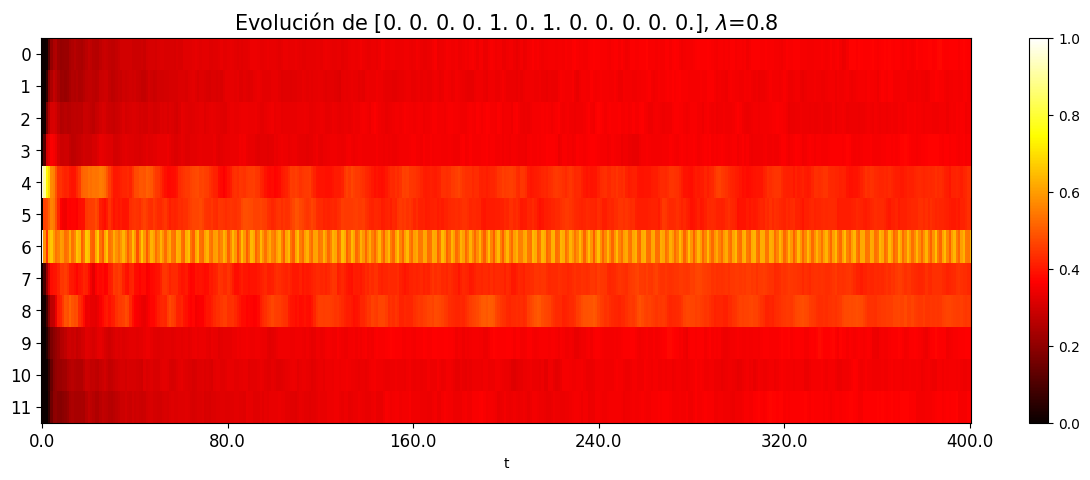

In [25]:
#Solución psi(t)

#ELECCIÓN DE CONDICIÓN INICIAL 
psi0=((tensor(mu,mu,mu,mu,vi,mu,vi,mu,mu,mu,mu,mu)).unit()).to("CSR") #blinker
#psi0=((tensor(mu,mu,vi,mu,vi,mu,vi,mu,vi,mu,mu,mu)).unit()).to("CSR") #termal

Nbits=12
t=np.linspace(0,400,400)
Nx=len(psi0.full())
Nt=len(t)

psi=sesolve(Hpert2,psi0,t) #CAMBIAR AQUÍ PARA RESOLVER PARA OTRA PERTURBACIÓN 
psit=psi.states

#REPRESENTACIÓN
n0es=matel_diag_t(n0,psit,t)
n1es=matel_diag_t(n1,psit,t)
n2es=matel_diag_t(n2,psit,t)
n3es=matel_diag_t(n3,psit,t)
n4es=matel_diag_t(n4,psit,t)
n5es=matel_diag_t(n5,psit,t)
n6es=matel_diag_t(n6,psit,t)
n7es=matel_diag_t(n7,psit,t)
n8es=matel_diag_t(n8,psit,t)
n9es=matel_diag_t(n9,psit,t)
n10es=matel_diag_t(n10,psit,t)
n11es=matel_diag_t(n11,psit,t)

matdens=np.array([n0es,n1es,n2es,n3es,n4es,n5es,n6es,n7es,n8es,n9es,n10es,n11es])
plt.figure(figsize=(15, 5)) 
mapacolor=plt.imshow(matdens.real,aspect='auto',cmap='hot',interpolation='nearest') #Otros colores:'BuPu','RdGy_r','cubehelix','CMRmap','hot'
plt.colorbar(mapacolor)
plt.yticks(ticks=[0, 1, 2, 3,4,5,6,7,8,9,10,11], labels=[' 0', ' 1', ' 2',' 3',' 4',' 5', ' 6', ' 7',' 8',' 9','10','11'],fontsize=12)
plt.xlabel('t')
plt.xticks(np.linspace(0,Nt- 1, num=6), np.linspace(0, max(t), num=6),fontsize=12)
plt.title('Evolución de {}, $\lambda$={}'.format(simpa_bin(posiciones(psi0.full()),Nbits)[0],l),fontsize=15)

In [26]:
#Espectros de energía (tarda cinco minutos)
l=0.5
Hpert1=H+l*Hph
Hpert2=H+l*Hhad
Hpert3=H+l*Hdis

Eesp0=H.eigenstates()
Eesp1=Hpert1.eigenstates()
Eesp2=Hpert2.eigenstates()
Eesp3=Hpert3.eigenstates()

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\D'
<>:46: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\D'
<>:46: SyntaxWarning: invalid escape sequence '\D'
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\3424656758.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$<\sigma_z>$',fontsize=14)
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\3424656758.py:25: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(t,spes,linewidth=0.8,label='<$\sigma_z$>')
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\3424656758.py:30: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('<$\sigma_z$>$_{tot}$',fontsize=15)
C:\Users\j

espín de equilibrio: (2.447371352109058+0j)
desvest de equilibrio: (5.068639376980954+0j)


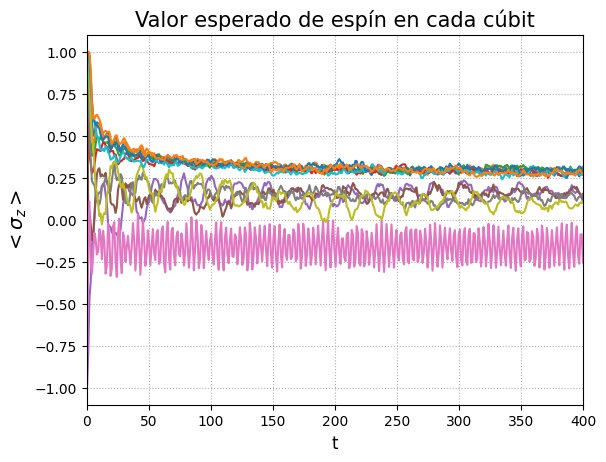

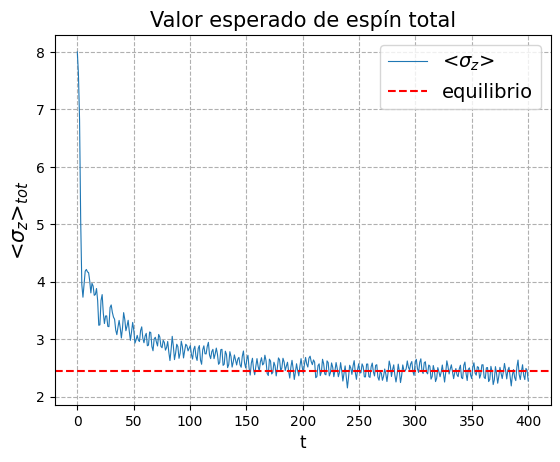

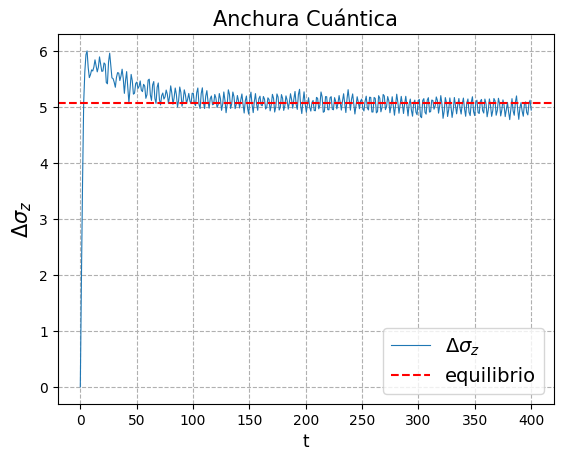

In [27]:
#espines
plt.figure(0)
sp0es=matel_dt_plot(sp0,psit,t,0)
sp1es=matel_dt_plot(sp1,psit,t,1)
sp2es=matel_dt_plot(sp2,psit,t,2)
sp3es=matel_dt_plot(sp3,psit,t,3)
sp4es=matel_dt_plot(sp4,psit,t,4)
sp5es=matel_dt_plot(sp5,psit,t,5)
sp6es=matel_dt_plot(sp6,psit,t,6)
sp7es=matel_dt_plot(sp7,psit,t,7)
sp8es=matel_dt_plot(sp8,psit,t,8)
sp9es=matel_dt_plot(sp9,psit,t,9)
sp10es=matel_dt_plot(sp10,psit,t,10)
sp11es=matel_dt_plot(sp11,psit,t,11)

plt.grid(linestyle=':')
plt.ylabel('$<\sigma_z>$',fontsize=14)
plt.xlabel('t',fontsize=12)
plt.title('Valor esperado de espín en cada cúbit',fontsize=15)

#espin total
spes=np.array(sp0es)+np.array(sp1es)+np.array(sp2es)+np.array(sp3es)+np.array(sp4es)+np.array(sp5es)+np.array(sp6es)+np.array(sp7es)+np.array(sp8es)+np.array(sp9es)+np.array(sp10es)+np.array(sp11es)
speseq=np.sum(spes[200:])/len(spes[200:])
plt.figure(1)
plt.plot(t,spes,linewidth=0.8,label='<$\sigma_z$>')
plt.axhline(speseq,linestyle='--',color='red',label='equilibrio')
plt.title("Valor esperado de espín total",fontsize=15)
plt.grid(linestyle='--')
plt.xlabel('t',fontsize=12)
plt.ylabel('<$\sigma_z$>$_{tot}$',fontsize=15)
plt.legend(fontsize=14)
print('espín de equilibrio: {}'.format(speseq))

#anchura cuántica 
plt.figure(2)
spdesvest=[]
for i in range(Nt):
    spvec=sptot*psit[i]
    spdesvest.append(np.sqrt((spvec.dag()*spvec)-spes[i]**2))
spdesvesteq=np.sum(spdesvest[60:])/len(spdesvest[60:])
plt.plot(t,spdesvest,linewidth=0.8,label='$\Delta\sigma_z$')
plt.title('Anchura Cuántica',fontsize=15)
plt.axhline(spdesvesteq,linestyle='--',color='red',label='equilibrio')
plt.grid(linestyle='--')
plt.xlabel('t',fontsize=12)
plt.ylabel('$\Delta\sigma_z$',fontsize=15)
plt.legend(fontsize=14)
print('desvest de equilibrio: {}'.format(spdesvesteq))

Amplitud= 159.13608348742883
Media= 2.5060346422226174
Desviación estándar= 0.19811595305507132


<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\3807971427.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma_{z,tot}$',size=14)
c:\Users\javim\miniconda3\Lib\site-packages\numpy\lib\_histograms_impl.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
c:\Users\javim\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:647: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)


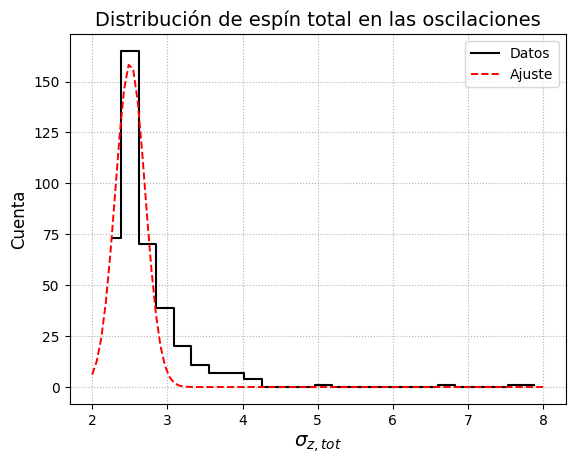

In [28]:
#distribución de oscilaciones
num_bins = 25
hist, bin_edges = np.histogram(spes, bins=num_bins) #cambiando spes por spdesvest se puede ver para la anchura cuántica también
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])


p0 = [20., 0., 1.]#parámetros aproximados iniciales-(A,mu,sig)
coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)
hist_fit = gauss(bin_centers, *coeff)

plt.plot(bin_centers, hist, drawstyle='steps-mid',label='Datos',color='black') #histograma

#PLOT DE AJUSTES
rangofit=np.linspace(2,8,100) #HACE FALTA CAMBIAR EL RANGO DEL LINSPACE PARA CADA CASO
plt.plot(rangofit, gauss(rangofit,*coeff), label='Ajuste',color='red',linewidth=1.4,linestyle='--') #blinker 
#plt.plot(np.linspace(-1,1,100), gauss(np.linspace(-1,1,100),*coeff), label='Ajuste',color='red',linewidth=1.4,linestyle='--') #termal

plt.grid(linestyle=':')
plt.legend()
plt.title('Distribución de espín total en las oscilaciones',size=14)
plt.xlabel('$\sigma_{z,tot}$',size=14)
plt.ylabel('Cuenta',size=12)

print('Amplitud=',coeff[0])
print ('Media=', coeff[1])
print ('Desviación estándar=', coeff[2])

plt.show()

PARTE 4 ESPECTROS DE ENERGÍA

In [29]:
#FUNCIONES
def coeficientes(Eespectro,psi0):
    coef = []
    coef2=[]
    for i in range(len(Eespectro[1])):
        coef.append(Eespectro[1][i].to("CSR").overlap(psi0))
        coef2.append((Eespectro[1][i].to("CSR").overlap(psi0))**2)
    return coef , coef2

def indices_degenerados(Eesp):
    unique, counts = np.unique(Eesp[0], return_counts=True)
    repeated_values = unique[counts > 1]
    indices = np.where(np.isin(Eesp[0], repeated_values))[0]
    j=0
    inddeg=[[],[],[],[],[],[],[],[]]
    g=[[],[],[],[],[],[],[],[]]
    for i in range(len(indices)-1):
        if (indices[i+1]-1)==indices[i]:
            inddeg[j].append(indices[i])
        else:
            inddeg[j].append(indices[i])
            g[j].append(len(inddeg[j]))
            j=j+1
    return [item for sublist in inddeg for item in sublist],[seq for seq in g if seq]

def matel_deg(Eesp,Op,indicesdeg,g):
    braket=[]
    for i in range(np.sum(g)):
        for j in range(np.sum(g)):
            if i<j:
                braket.append(Op.matrix_element(Eesp[1][indicesdeg][i],Eesp[1][indicesdeg][j]))
    return braket

def valesp_deg(coeficientes,braket,indicesdeg):
    coefprod=[]
    for i in range(int(0.5*(1+np.sqrt(1+8*len(braket))))):
        for j in range(int(0.5*(1+np.sqrt(1+8*len(braket))))):
            if i<j:
                coefprod.append(coeficientes[indicesdeg[i]]*coeficientes[indicesdeg[j]])
    valespdeg=0.5*sum(np.array(coefprod)*np.array(braket))
    #valespdia=sum(np.array(coeficientes[indicesdeg[len(braket)**0.5*i+j]]*coeficientes[indicesdeg[len(braket)**0.5*i+j]])*braket[len(braket)**0.5*i+j])
    return valespdeg

def valesp_diag(Eesp,Op,coeficientes2):
    braket=[]
    for i in range(len(Eesp[1])):
        braket.append(Op.matrix_element(Eesp[1][i],Eesp[1][i]))
    valesp=np.sum(np.array(braket)*np.array(coeficientes2))
    return valesp, braket

def matel_diag_E(Eesp,Op):
    braket=[]
    for i in range(len(Eesp[1])):
        braket.append(Op.matrix_element(Eesp[1][i],Eesp[1][i]))
    return  braket


def valesp_mic(Eesp,rango,braket):
    _,gk=np.unique(Eesp[0][rango], return_counts=True)
    ind=0
    elmatsubesp=[]
    elmatmic=[]
    for k in range(len(gk)):
        for j in range(gk[k]):
            ind=ind+1
            elmatsubesp.append(np.array(braket)[rango][ind-1])
        elmatmic.append(np.sum(elmatsubesp)/gk[k])
        elmatsubesp=[]
    return np.sum(elmatmic)/len(gk)

In [30]:
#Coeficientes de la descomposición de psi0 en base de energías
psi0b=((tensor(mu,mu,mu,mu,vi,mu,vi,mu,mu,mu,mu,mu)).unit()).to("CSR")
psi0t=((tensor(mu,mu,vi,mu,vi,mu,vi,mu,vi,mu,mu,mu)).unit()).to("CSR")

coef0b,coef0b_cuad=coeficientes(Eesp0,psi0b)
coef0t,coef0t_cuad=coeficientes(Eesp0,psi0t)
coef1b,coef1b_cuad=coeficientes(Eesp1,psi0b)
coef1t,coef1t_cuad=coeficientes(Eesp1,psi0t)
coef2b,coef2b_cuad=coeficientes(Eesp2,psi0b)
coef2t,coef2t_cuad=coeficientes(Eesp2,psi0t)
coef3b,coef3b_cuad=coeficientes(Eesp3,psi0b)
coef3t,coef3t_cuad=coeficientes(Eesp3,psi0t)

C:\Users\javim\AppData\Local\Temp\ipykernel_18228\2137236683.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\2137236683.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\2137236683.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\javim\AppData\Local\Temp\ipykernel_18228\2137236683.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  p

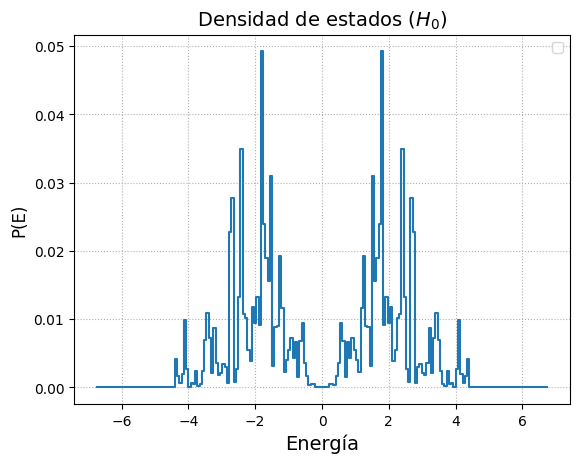

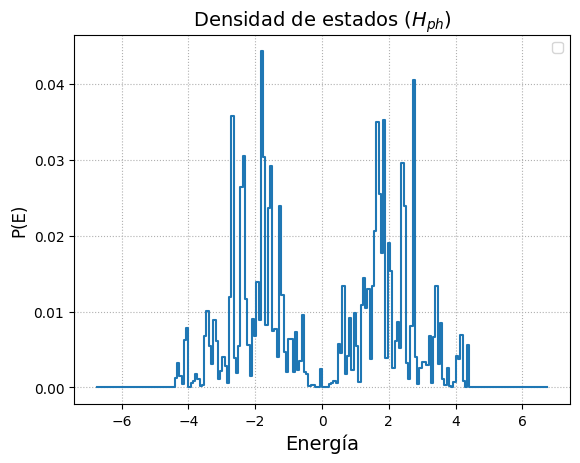

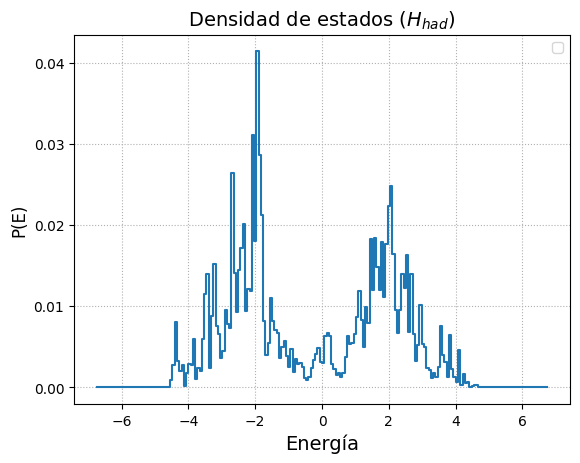

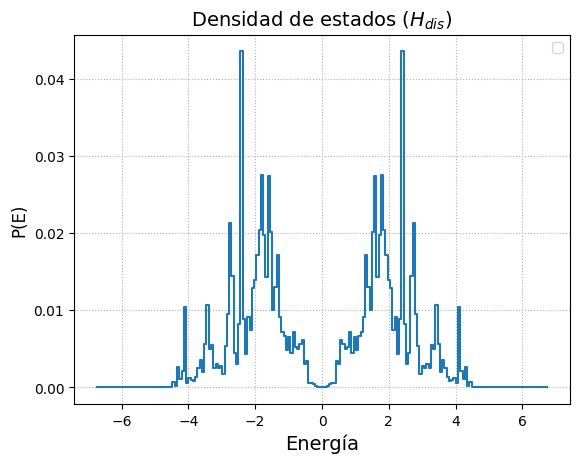

In [31]:
#densidad de estados (sólo para psi0 termal)
num_bins = 200
hist0, bin_edges = np.histogram(Eesp0[0], bins=num_bins,weights=coef0t_cuad)
hist1, bin_edges = np.histogram(Eesp1[0], bins=num_bins,weights=coef1t_cuad)
hist2, bin_edges = np.histogram(Eesp2[0], bins=num_bins,weights=coef2t_cuad)
hist3, bin_edges = np.histogram(Eesp3[0], bins=num_bins,weights=coef3t_cuad)

bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure(0)
plt.plot(bin_centers, hist0, drawstyle='steps-mid') 
plt.grid(linestyle=':')
plt.legend()
plt.title('Densidad de estados $(H_{0})$',size=14)
plt.xlabel('Energía',size=14)
plt.ylabel('P(E)',size=12)
plt.figure(1)
plt.plot(bin_centers, hist1, drawstyle='steps-mid') 
plt.grid(linestyle=':')
plt.legend()
plt.title('Densidad de estados $(H_{ph})$',size=14)
plt.xlabel('Energía',size=14)
plt.ylabel('P(E)',size=12)
plt.figure(2)
plt.plot(bin_centers, hist2, drawstyle='steps-mid') 
plt.grid(linestyle=':')
plt.legend()
plt.title('Densidad de estados $(H_{had})$',size=14)
plt.xlabel('Energía',size=14)
plt.ylabel('P(E)',size=12)
plt.figure(3)
plt.plot(bin_centers, hist3, drawstyle='steps-mid') 
plt.grid(linestyle=':')
plt.legend()
plt.title('Densidad de estados $(H_{dis})$',size=14)
plt.xlabel('Energía',size=14)
plt.ylabel('P(E)',size=12)
plt.show()

In [32]:
#elementos de matriz
elmat0=matel_diag_E(Eesp0,sptot)
elmat1=matel_diag_E(Eesp1,sptot)
elmat2=matel_diag_E(Eesp2,sptot)
elmat3=matel_diag_E(Eesp3,sptot)

In [33]:
#valor esperado de espín microcanónico
cotasup=-1.5
cotainf=-2.5
desfasehad=-0.5

rango0=np.where(np.logical_or(np.logical_and(Eesp0[0]>=cotainf, Eesp0[0]<=cotasup),np.logical_and(Eesp0[0]>=-cotasup, Eesp0[0]<=-cotainf)))
rango1=np.where(np.logical_or(np.logical_and(Eesp1[0]>=cotainf, Eesp1[0]<=cotasup),np.logical_and(Eesp1[0]>=-cotasup, Eesp1[0]<=-cotainf)))
rango2=np.where(np.logical_or(np.logical_and(Eesp2[0]>=cotainf, Eesp2[0]<=cotasup),np.logical_and(Eesp2[0]>=-cotasup, Eesp2[0]<=-cotainf)))
rango3=np.where(np.logical_or(np.logical_and(Eesp3[0]>=cotainf, Eesp3[0]<=cotasup),np.logical_and(Eesp3[0]>=-cotasup, Eesp3[0]<=-cotainf)))

valesp0_mic=valesp_mic(Eesp0,rango0,elmat0)
valesp1_mic=valesp_mic(Eesp1,rango1,elmat1)
valesp2_mic=valesp_mic(Eesp2,rango2,elmat2)
valesp3_mic=valesp_mic(Eesp3,rango3,elmat3)


print('en el colectivo microcanónico:',valesp0_mic,valesp1_mic,valesp2_mic,valesp3_mic)
print('experimentalmente:',0.052,0.033,-0.002,-0.015)
print('número de estados en el subespacio=', len(rango0[0]))

en el colectivo microcanónico: (-0.0018092609442746507+0j) (-0.015993065091864135+0j) (0.0009065924468043699+0j) (-0.010442595318431815+0j)
experimentalmente: 0.052 0.033 -0.002 -0.015
número de estados en el subespacio= 980
